## **IMAGE SEGMENTATION(WEEK1 TASK)**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')


os.chdir('/content/drive/MyDrive')

Mounted at /content/drive


In [4]:
base_dir = '/content/drive/MyDrive/VOC2012_train_val/VOC2012_train_val'
image_dir = os.path.join(base_dir, 'JPEGImages')
mask_dir = os.path.join(base_dir, 'SegmentationClass')

all_image_names = sorted(os.listdir(image_dir))
images_with_any_object = []

object_class_ids = list(range(1, 21))

count = 0
for image_name in all_image_names:
    mask_name = image_name.replace('.jpg', '.png')
    mask_path = os.path.join(mask_dir, mask_name)

    if os.path.exists(mask_path):
        try:
            mask = Image.open(mask_path)
            mask_np = np.array(mask)


            if any(obj_id in np.unique(mask_np) for obj_id in object_class_ids):
                images_with_any_object.append(image_name)
                count += 1
                if count >= 10:
                    break
        except Exception:
            continue

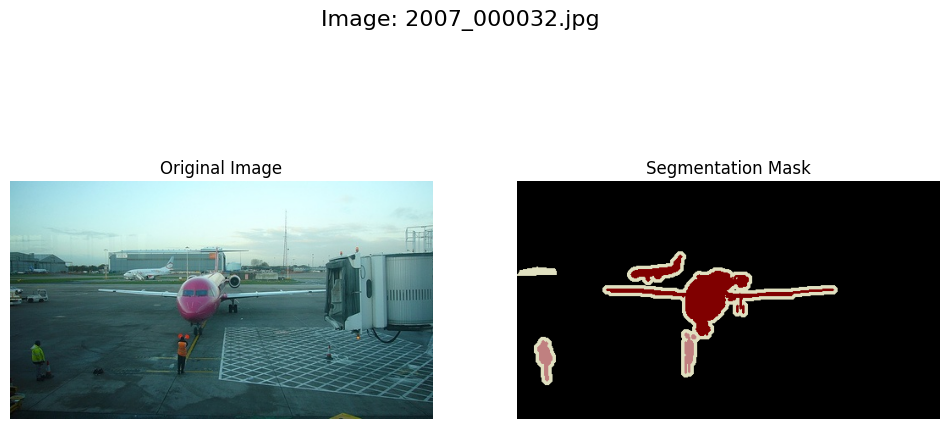

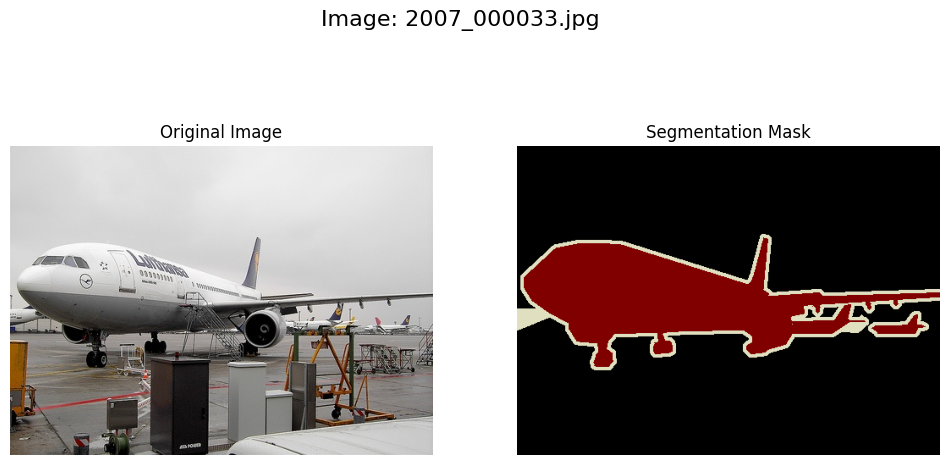

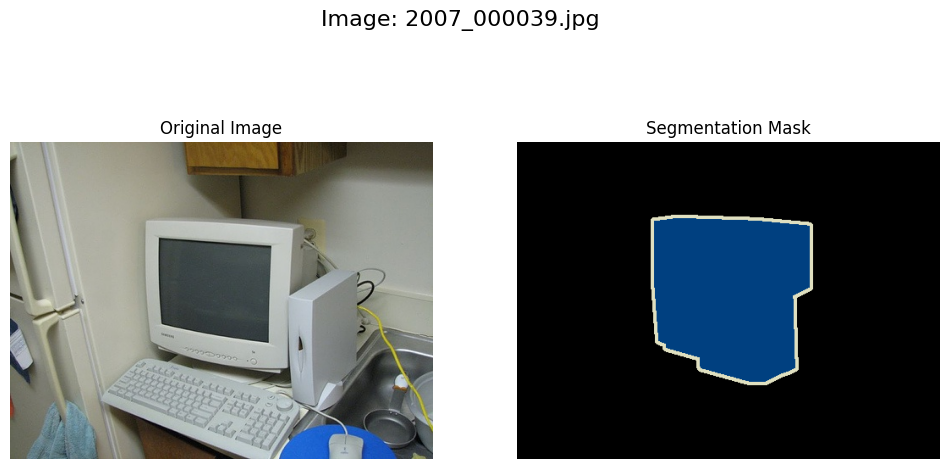

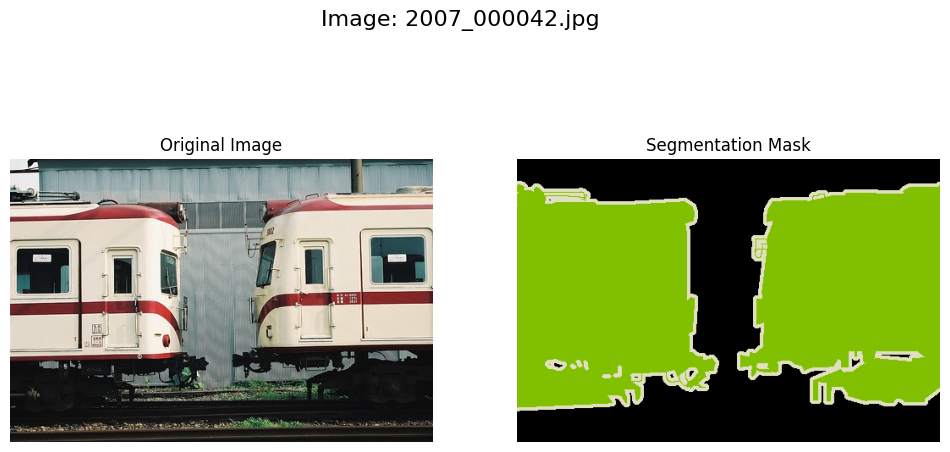

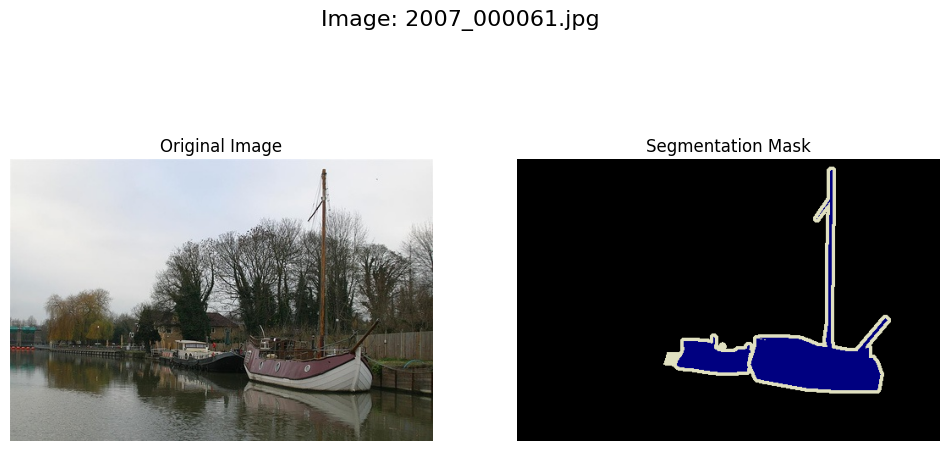

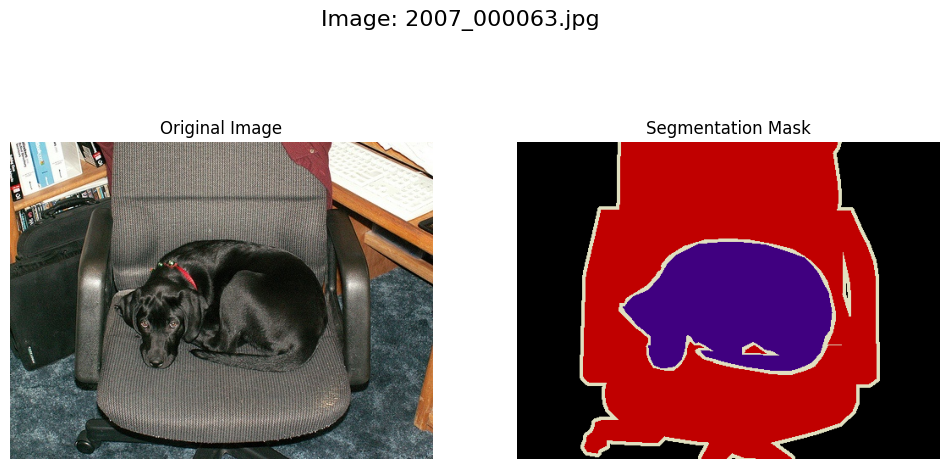

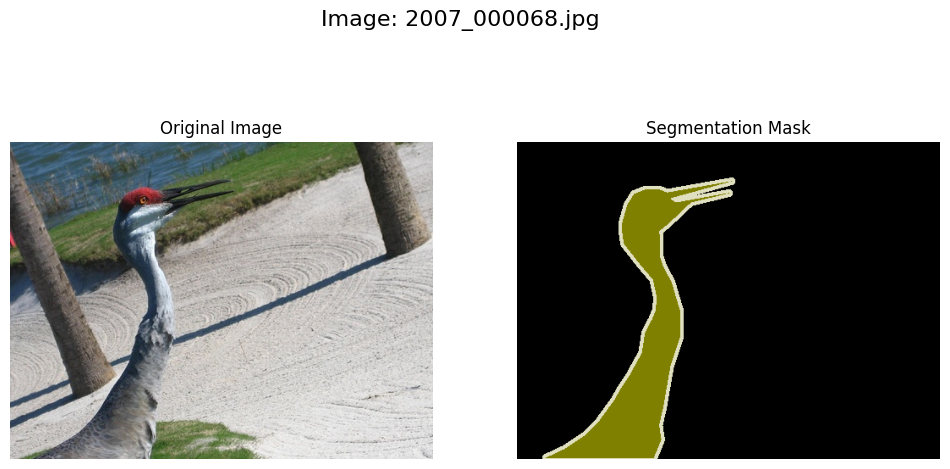

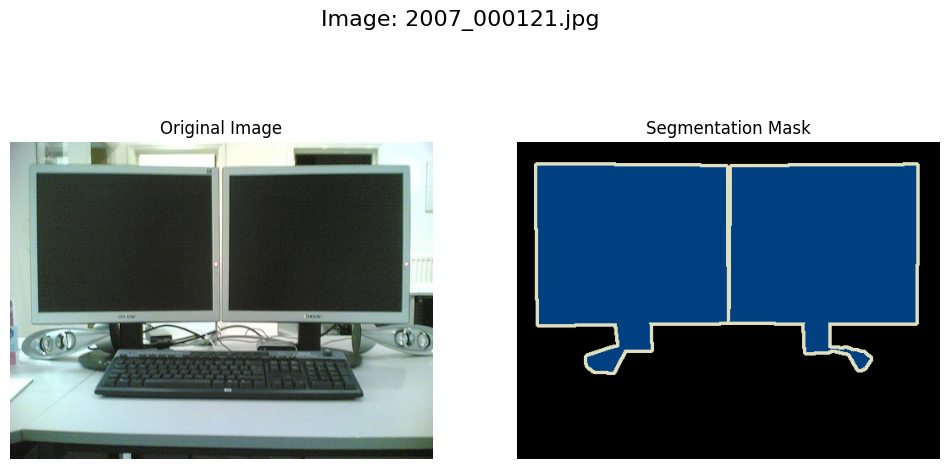

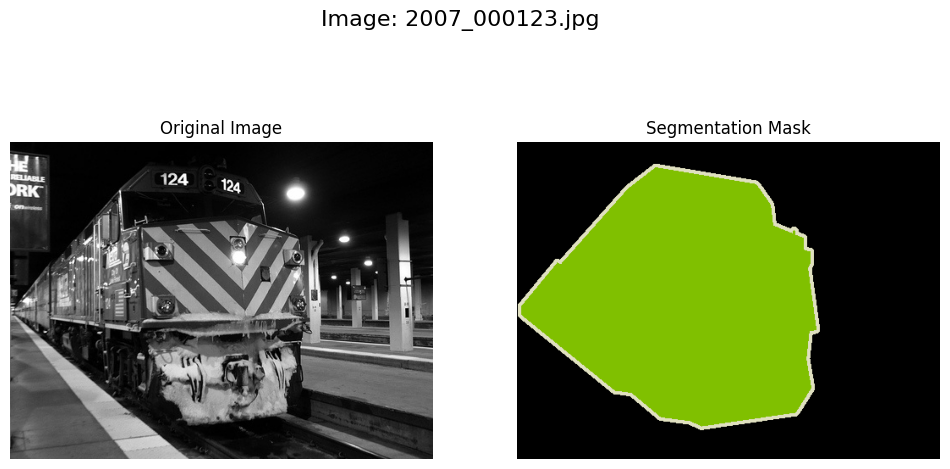

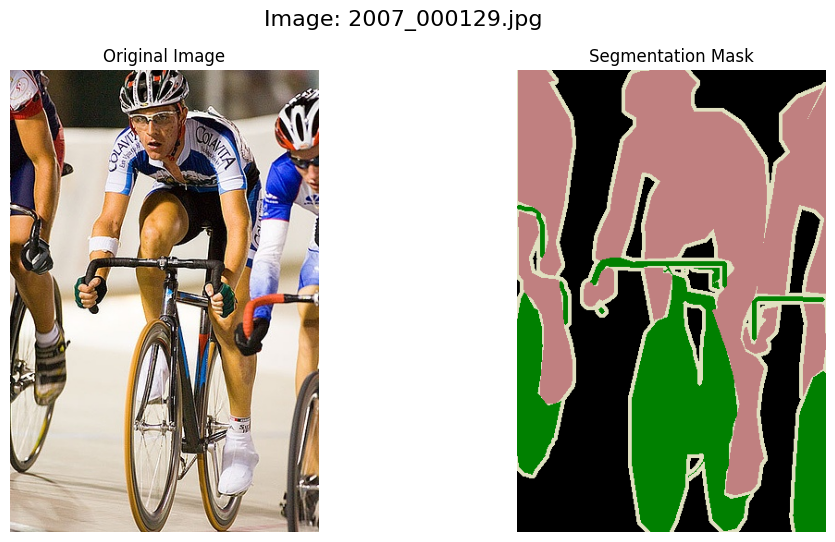

In [6]:
for image_name in images_with_any_object:
    image_path = os.path.join(image_dir, image_name)
    mask_name = image_name.replace('.jpg', '.png')
    mask_path = os.path.join(mask_dir, mask_name)

    try:
        original_image = Image.open(image_path).convert("RGB")
        original_mask = Image.open(mask_path)

        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        fig.suptitle(f'Image: {image_name}', fontsize=16)

        ax[0].imshow(original_image)
        ax[0].set_title('Original Image')
        ax[0].axis('off')

        ax[1].imshow(original_mask)
        ax[1].set_title('Segmentation Mask')
        ax[1].axis('off')

        plt.show()

    except Exception as e:
        print(f"Failed to process {image_name}: {e}")

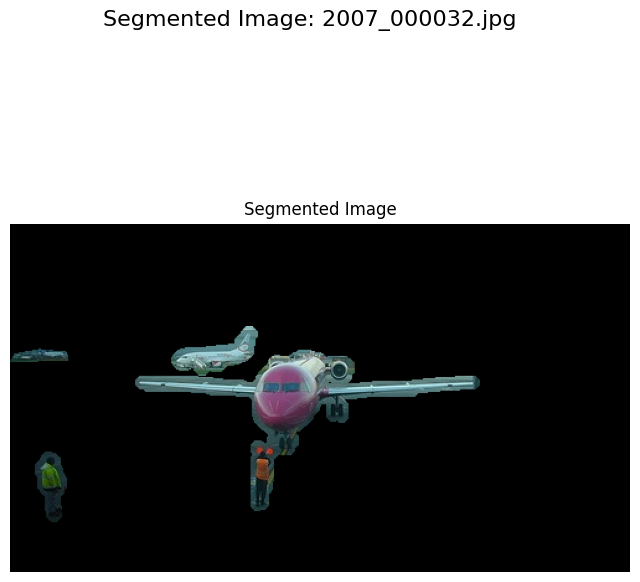

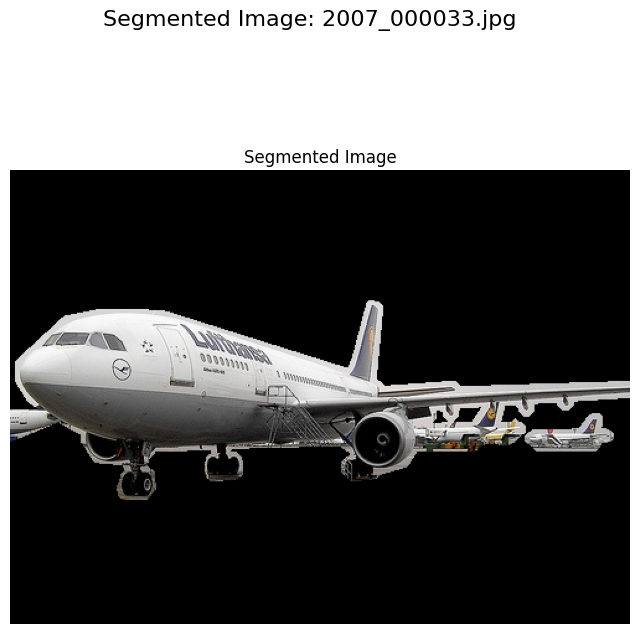

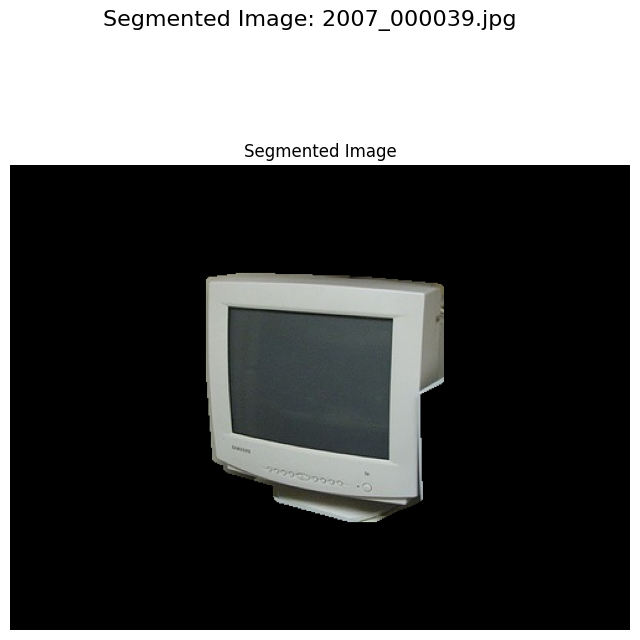

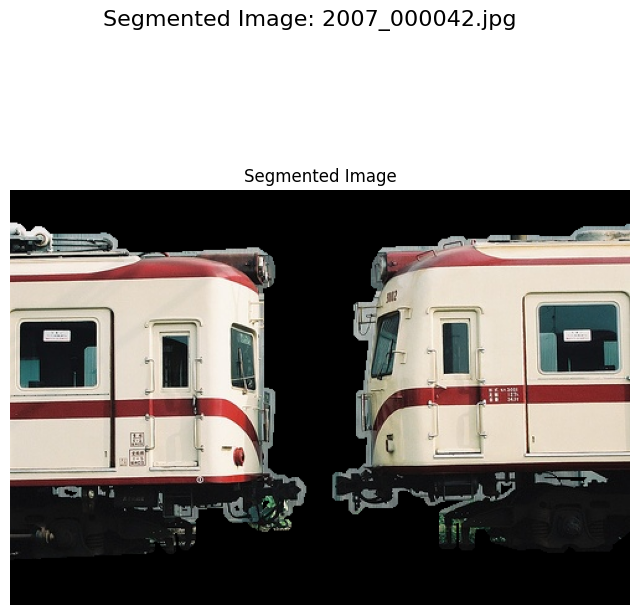

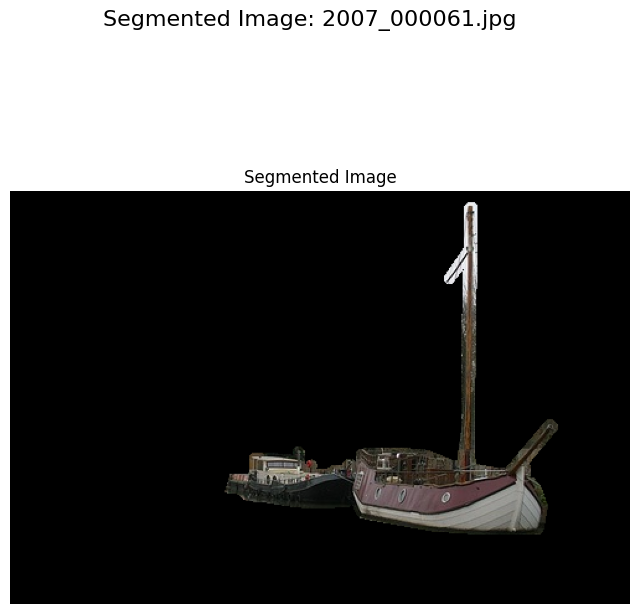

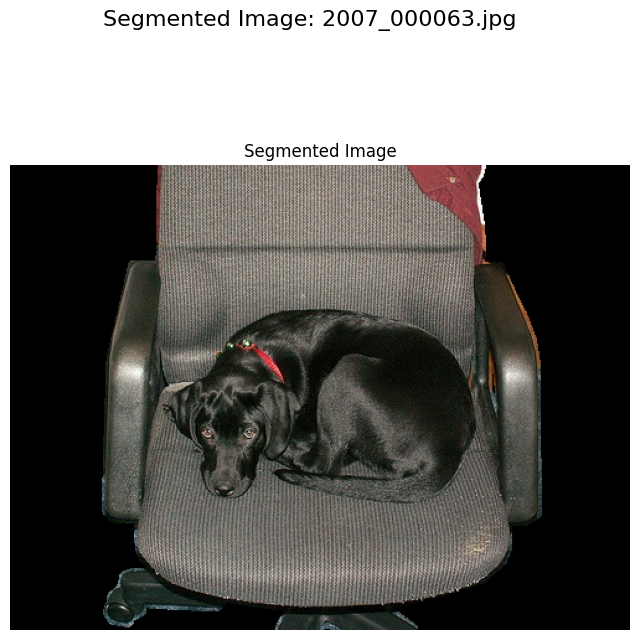

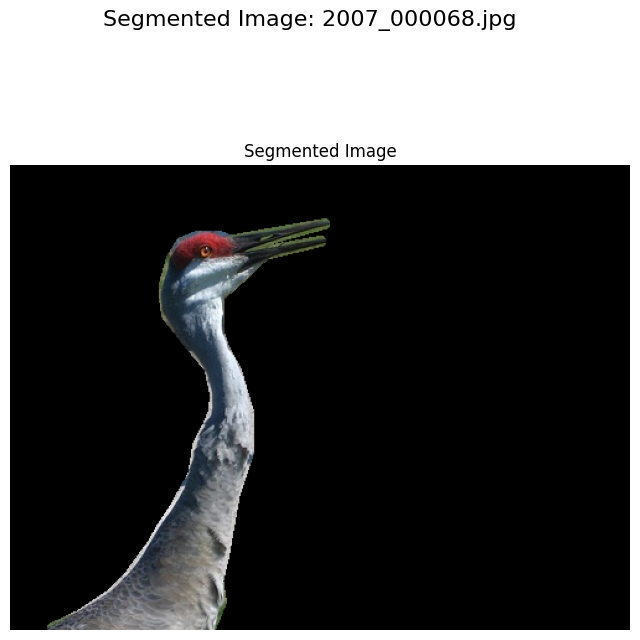

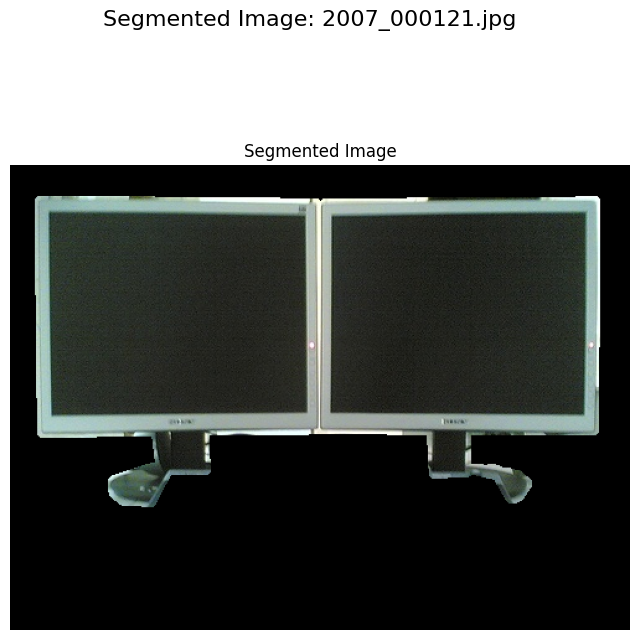

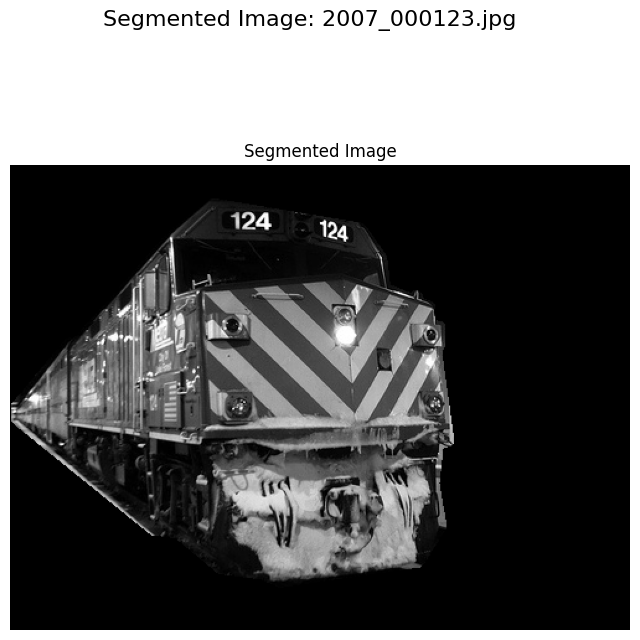

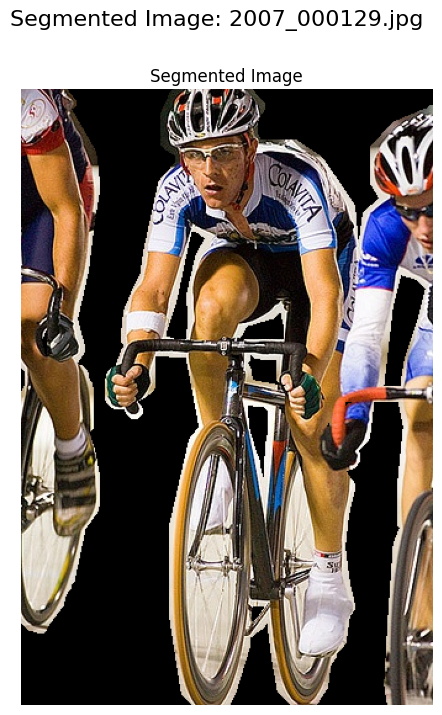

In [9]:

for image_name in images_with_any_object:
    image_path = os.path.join(image_dir, image_name)
    mask_name = image_name.replace('.jpg', '.png')
    mask_path = os.path.join(mask_dir, mask_name)

    try:
        original_image = Image.open(image_path).convert("RGB")
        original_mask = Image.open(mask_path)

        mask_np = np.array(original_mask)

        all_objects_mask = (mask_np != 0)

        segmented_image_np = np.zeros_like(np.array(original_image))
        segmented_image_np[all_objects_mask] = np.array(original_image)[all_objects_mask]

        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        fig.suptitle(f'Segmented Image: {image_name}', fontsize=16)

        ax.imshow(segmented_image_np.astype(np.uint8))
        ax.set_title('Segmented Image')
        ax.axis('off')

        plt.show()

    except Exception as e:
        print(f"Failed to process {image_name}: {e}")